In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import numpy.linalg as la
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
import math
import matplotlib.pyplot as plt
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string
from bs4 import BeautifulSoup
from sklearn.decomposition import TruncatedSVD

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Importing Libraries and getting list commonly used English words called stopwords and creating a new Porter stemmer to stem the words.

Solution of Q.1

Importing Digits Dataset

In [4]:
digits = load_digits()
A = digits.data
print(A)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


(a) Implementing SVD manually

In [5]:
AAT = np.matmul(A, A.T)
ATA = np.matmul(A.T, A)

eig_vals_ATA, eig_vecs_ATA = la.eig(ATA)
eig_vals_AAT, eig_vecs_AAT = la.eig(AAT)

u = np.real(eig_vecs_AAT)
i1 = np.argsort(np.sqrt(abs(eig_vals_AAT)))[::-1]
s = np.sqrt(abs(eig_vals_ATA))
i2 = np.argsort(s)[::-1]
vt = np.real(eig_vecs_ATA).T

print(f"Left Singular Vectors:\n{u[i1]}")
print(f"Singular Values:\n{np.diag(s[i2])}")
print(f"Right Singular Vectors:\n{vt[i2]}")

Left Singular Vectors:
[[-0.02091144  0.00210251 -0.03892964 ...  0.00438488  0.00438488
  -0.00449571]
 [-0.02531995 -0.01386563  0.03779892 ...  0.00043634  0.00043634
  -0.00060232]
 [-0.02545593 -0.01219512  0.01782724 ... -0.00136498 -0.00136498
   0.00125565]
 ...
 [-0.02496691 -0.05586005 -0.00526346 ...  0.00818642  0.00818642
   0.00069544]
 [-0.02619547  0.02580868 -0.02508626 ...  0.00017346  0.00017346
   0.01125307]
 [-0.02906474 -0.01130847 -0.03873428 ...  0.01083524  0.01083524
  -0.00784467]]
Singular Values:
[[2193.11933683    0.            0.         ...    0.
     0.            0.        ]
 [   0.          566.99677184    0.         ...    0.
     0.            0.        ]
 [   0.            0.          542.00493276 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.   

(b) Implementing SVD using inbuilt function

In [6]:
u, s, vt = la.svd(A)

print(f"Left Singular Vectors:\n{u}")
print(f"Singular Values:\n{np.diag(s)}")
print(f"Right Singular Vectors:\n{vt}")

Left Singular Vectors:
[[ 2.09114372e-02 -2.10250887e-03  3.89296445e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.53199533e-02  1.38656341e-02 -3.77989154e-02 ...  1.18825599e-03
  -3.33900710e-03  2.51535340e-03]
 [ 2.54559261e-02  1.21951237e-02 -1.78272413e-02 ... -1.27767364e-02
  -2.35453438e-03 -4.88280252e-02]
 ...
 [ 2.98784403e-02  1.87985701e-02 -1.16134751e-02 ...  9.72347285e-01
  -1.96905527e-04 -1.21350744e-02]
 [ 2.67227437e-02 -8.66186959e-03  2.34742370e-02 ... -1.53701501e-04
   9.71377679e-01  5.63979192e-04]
 [ 2.93865591e-02 -8.03379300e-04  1.29922129e-02 ... -1.13050937e-02
   5.07518887e-04  9.65042602e-01]]
Singular Values:
[[2.19311934e+03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.66996772e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.42004933e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.000

Solution of Q.2

(a) Reading IMDB Dataset

In [7]:
df = pd.read_csv("/content/drive/My Drive/ColabFiles/IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


(b) Dropping sentiment column

In [8]:
df = df.drop("sentiment", axis = 1)
print(df.head())

                                              review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
3  Basically there's a family where a little boy ...
4  Petter Mattei's "Love in the Time of Money" is...


(c) Selecting first 100 rows of datset (1000 rows was taking too much time)

In [9]:
df = df.iloc[:100]
print(df.head())

                                              review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
3  Basically there's a family where a little boy ...
4  Petter Mattei's "Love in the Time of Money" is...


Preprocessing the data for Bag of Words conversion

In [10]:
def preprocess(s):
    soup = BeautifulSoup(s, "lxml")
    s = soup.get_text()
    s = s.lower()
    word_tokens = [porter.stem(i) for i in word_tokenize(s) if i not in string.punctuation and i not in stop_words and i.isalpha()]
    return ' '.join(word_tokens)
df1 = df['review'].apply(preprocess)
print(df1.head())

0    one review mention watch oz episod hook right ...
1    wonder littl product film techniqu fashion giv...
2    thought wonder way spend time hot summer weeke...
3    basic famili littl boy jake think zombi closet...
4    petter mattei love time money visual stun film...
Name: review, dtype: object


(d) Conversion to binary Bag of Words

In [11]:
vectorizer = CountVectorizer(binary = True)
count = vectorizer.fit_transform(df1).toarray()
print(count)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(e) Computing co-occurrence matrix

In [12]:
co_occ = count.T.dot(count)
print(co_occ)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


(f) Finding reduced matrix using Truncated SVD

In [13]:
svd = TruncatedSVD(n_components = 100)
df1_reduced = svd.fit_transform(co_occ)
print(df1_reduced)

[[ 5.03829829e+00  4.44455388e-01  7.43123829e-01 ... -2.02980123e-02
   1.10047317e-02  9.11199658e-03]
 [ 3.09929669e+00  5.31003102e-01 -1.33351214e-01 ... -8.79696278e-02
   9.53468533e-02  4.33206750e-02]
 [ 4.30029888e+00 -4.43325983e-01 -7.72960888e-01 ...  6.66606164e-02
   7.09169501e-02 -1.81080210e-02]
 ...
 [ 3.86792159e+00  1.26122090e+00 -7.73306621e-01 ... -4.03229486e-04
  -3.08520249e-02 -8.92071577e-03]
 [ 2.57552473e+00  6.18792035e-01  9.16338235e-02 ...  1.65893512e-02
  -1.84761021e-02  6.50507140e-02]
 [ 6.39141709e+00 -9.96712168e+00 -8.80725106e+00 ...  5.59990495e-02
  -5.10730032e-03 -2.81713816e-02]]


Solution of Q.3

Importing Iris Dataset

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
print(np.concatenate((X, y.reshape(len(y), 1)), axis=1))

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.2 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.6 1.4 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1

Implementing LDA manually

In [15]:
columns_count = X.shape[1]
labels = np.unique(y)

mean = np.mean(X, axis=0)
SW = np.zeros((columns_count, columns_count))
SB = np.zeros((columns_count, columns_count))
for l in labels:
    x_list = X[y == l]
    mean_x = np.mean(x_list, axis = 0)
    deviation = x_list - mean_x
    SW += deviation.T.dot(deviation)
    n = x_list.shape[0]
    mean_diff = (mean_x - mean).reshape(columns_count, 1)
    SB += n * mean_diff.dot(mean_diff.T)

A = np.linalg.inv(SW).dot(SB)
eig_vals, eig_vecs = np.linalg.eig(A)
eig_vecs = eig_vecs.T
i = np.argsort(abs(eig_vals))[::-1]
eig_vals = eig_vals[i]
eig_vecs = (eig_vecs[i])[:2]
X_projected = np.dot(X, eig_vecs.T)
print(X_projected)

[[-1.49920971 -1.88675441]
 [-1.2643595  -1.59214275]
 [-1.35525305 -1.73341462]
 [-1.18495616 -1.62358806]
 [-1.5169559  -1.94476227]
 [-1.40864014 -2.20148038]
 [-1.28548339 -1.90177269]
 [-1.38431399 -1.80218401]
 [-1.12136823 -1.53021571]
 [-1.31831374 -1.54860234]
 [-1.58367182 -1.98077996]
 [-1.28716445 -1.77562146]
 [-1.31422036 -1.51454424]
 [-1.37605297 -1.58704672]
 [-1.94923317 -2.23514437]
 [-1.77516687 -2.54725756]
 [-1.63024483 -2.302505  ]
 [-1.42847467 -1.96369972]
 [-1.50337736 -2.06783361]
 [-1.48893461 -2.11442674]
 [-1.35700838 -1.75428449]
 [-1.3795792  -2.13271099]
 [-1.65506386 -2.0431741 ]
 [-1.04356034 -1.92449977]
 [-1.12096094 -1.699853  ]
 [-1.17443134 -1.54228363]
 [-1.18744274 -1.93081847]
 [-1.46468272 -1.86215146]
 [-1.48146353 -1.82874656]
 [-1.18904953 -1.65764616]
 [-1.17130335 -1.5996383 ]
 [-1.32634064 -1.95868741]
 [-1.76713997 -2.13717248]
 [-1.85304902 -2.29999459]
 [-1.2475787  -1.62554765]
 [-1.47327677 -1.76063036]
 [-1.63810761 -1.91462335]
 

Plotting reduced dataset

<ipython-input-16-1c7c9d9e9037>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y, cmap=plt.cm.get_cmap('viridis', 3))


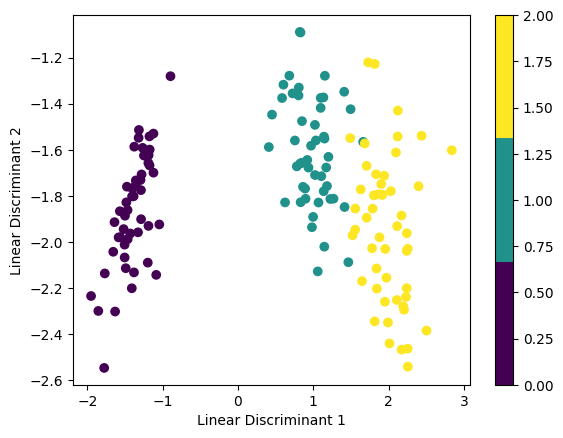

In [16]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, cmap=plt.cm.get_cmap('viridis', 3))
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.colorbar()
plt.show()